# Análisis de actividad sísmica en México

![Alerta](im.png)

Para los que tengan curiosidad de ver cómo se sacó la información de la página del SSN, hay otro .ipynb en este folder donde se explica detalladamente. Lo primero que hay que hacer es cargar los paquetes necesarios. Esto significa importar (e instalar anteriormente) los siguientes paquetes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

from helpers.Mexico import Republica

republica = Republica()

sns.set_style("darkgrid")

El paquete de seaborn lo pueden instalar con pip3, al igual que folium. helpers.Mexico es un paquete que yo hice para ayudarles un poco, de ahí saco la clase `Republica`.

De los paquetes necesarios, `Folium` es por mucho el más complejo. Permite hacer mapas interactivos en jupyter. Yo me he dado a la tarea de bajar del inegi las divisiones políticas del país y pasarlas a un formato que `Folium` entiende, conocido como topojson. El archivo se encuentra en el folder `helpers`. No es necesario que entiendan su contenido, pero yo les explicaré más adelante su uso.

Carguemos rápidamente el csv de la actividad sísmica reportada por el SSN de la UNAM desde el 1 de Enero de 1990 hasta el 17 de Febrero del 2018. Además de cargar el csv, vamos a ver los primeros 5 renglones, para familiarizarnos con el formato:

In [2]:
#Definimos una lambda que convierta una cadena de caracteres en una etiqueta de tiempo.
mConverters = {'Fecha y Hora': lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S') }
#Usamos la lambda para cargar el csv. Los nombres de las columnas son el primer renglón
sismos = pd.read_csv('helpers/earthquakes.csv', index_col = 0, converters = mConverters)
#Mostremos los primeros 5 renglones con la función head
sismos.head()

,Magnitud,Latitud,Longitud,Profundidad (km),Fecha y Hora
0,3.2,15.83,-98.41,17,2018-02-17 23:57:31
1,2.8,16.28,-98.08,12,2018-02-17 23:56:51
2,3.1,16.21,-98.02,10,2018-02-17 23:53:03
3,2.8,16.03,-97.75,16,2018-02-17 23:52:22
4,4.1,32.64,-115.18,4,2018-02-17 23:49:44


El csv es muy, muy sencillo. Contiene sólo 5 columnas: Magnitud, Latitud, Longitud, Profundidad y Fecha-Hora. Las primeras tres columnas son flotantes, mientras la quinta es una estampa de tiempo. Tendrán que aprender a usar estampas de tiempo pero yo les puedo ayudar.

## Ejercicio 1: Magnitud de los sismos

Calculen las siguientes cantidades (explicando en su código cómo lo hacen):
1. Cuenta total de sismos
2. Rango de magnitud de los sismos
3. Número de sismos por cada categoría, siendo las categorías {[1,2), [2,3),[3,4),[4,5),[5,6),[6,7),[7,8),[8,9)}
3. Número de sismos en cada año, graficado como un histograma (¿Ha aumentado la actividad sísmica?)

Total de sismos:  105946
Cantidad sismos en 1990 : 795
Cantidad sismos en 1991 : 724
Cantidad sismos en 1992 : 613
Cantidad sismos en 1993 : 915
Cantidad sismos en 1994 : 622
Cantidad sismos en 1995 : 678
Cantidad sismos en 1996 : 789
Cantidad sismos en 1997 : 1006
Cantidad sismos en 1998 : 1022
Cantidad sismos en 1999 : 1098
Cantidad sismos en 2000 : 1043
Cantidad sismos en 2001 : 1335
Cantidad sismos en 2002 : 1688
Cantidad sismos en 2003 : 1323
Cantidad sismos en 2004 : 1346
Cantidad sismos en 2005 : 1210
Cantidad sismos en 2006 : 1355
Cantidad sismos en 2007 : 1528
Cantidad sismos en 2008 : 1955
Cantidad sismos en 2009 : 2302
Cantidad sismos en 2010 : 3462
Cantidad sismos en 2011 : 4272
Cantidad sismos en 2012 : 5243
Cantidad sismos en 2013 : 5360
Cantidad sismos en 2014 : 7606
Cantidad sismos en 2015 : 10944
Cantidad sismos en 2016 : 15281
Cantidad sismos en 2017 : 26123
Cantidad sismos en 2018 : 4308


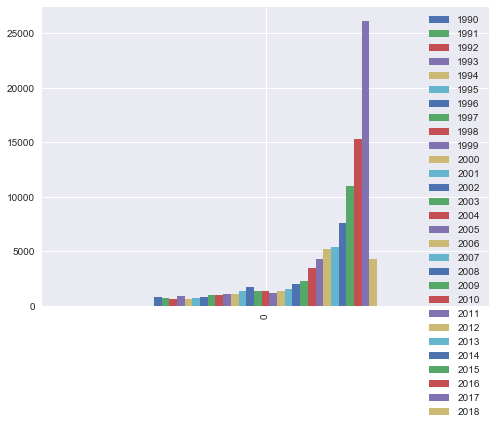

In [61]:
#Contamos todos los sismos con shape[0]
print("Total de sismos: ", sismos.shape[0])

#Separamos la columna de años para contar por año
sismos['Año'] = sismos['Fecha y Hora'].dt.year
#Creamos un df vacio
df = pd.DataFrame(index = range(1), columns = range(29))
#Lo llenamos con las cuentas para cada año
for i in range(0,29):
    df[i] = sismos[sismos['Año'] == i +1990].shape[0]
    df.rename(columns = {i : i + 1990}, inplace= True) 
    print('Cantidad sismos en', int(i+1990), ':', sismos[sismos['Año'] == i + 1990].shape[0])
#Graficamos el histograma
df.plot(kind = 'bar')
plt.show()

## Ejercicio 2: Graficando en el mapa

Para lo que viene, ustedes deben añadir una columna de nombre "Estado" al DataFrame `sismos`. Para ello, la variable `republica` declarada al principio del documento tiene una función llamada `estadoSegunPunto` que recibe como parámetros un par de números (latitud y longitud) y dice en qué estado de la república ocurrió el sismo (por ejemplo `republica.estadoSegunPunto(19,-100)`. La función devuelve `np.nan` si el punto no se encuentra dentro de un estado. Como ejercicio:

1. Calculen el porcentaje de epicentros dentro del territorio mexicano (en este caso el mar no cuenta).
2. Calculen cuántos sismos ocurrieron por estado.
3. Determinen cual es el estado con menor actividad sísmica (en cuanto a epicentros) y cuál el de mayor
4. Hagan un mapa de colores de la actividad sísmica por estado. Agarren buenos colores y usen una buena escala.

Para el cuarto punto, utilicen `Folium`. Les dejo el tip: las funciones que necesitan son `folium.Map()` (que genera un objeto, llamémoslo `mexmap`) y la función `.choropleth` (miembro de `mexmap`). Hay ejemplos en internet de esto, pero si tienen dudas y están muy muy frustrados, mándenme un correo y les ayudo un poco. Para generar el _choropleth_, necesitan el archivo `helpers/mexican_states.geojson`, la función `choropleth` se los va a pedir pero no tienen que entender lo que hay dentro. Ah, eso sí, los nombres de los estados están etiquetados por el nombre "NOM_ENT" (`choropleth` se los va a pedir...).

In [79]:
#Generamos una nueva columna Estado
sismos['Estado'] = pd.DataFrame(index = range(sismos.shape[0]), columns = range(1))
sismos.head()

,Magnitud,Latitud,Longitud,Profundidad (km),Fecha y Hora,Año,Estado
0,3.2,15.83,-98.41,17,2018-02-17 23:57:31,2018,NaN
1,2.8,16.28,-98.08,12,2018-02-17 23:56:51,2018,NaN
2,3.1,16.21,-98.02,10,2018-02-17 23:53:03,2018,NaN
3,2.8,16.03,-97.75,16,2018-02-17 23:52:22,2018,NaN
4,4.1,32.64,-115.18,4,2018-02-17 23:49:44,2018,NaN


In [80]:
#Aplicamos el código dado para transformar las coordenadas al nombre del estado
for i in range(sismos.shape[0]):
    sismos['Estado'].values[i] = republica.estadoSegunPunto(sismos['Latitud'][i],sismos['Longitud'][i])

In [32]:
#Buscamos los terremotos que unicamente sucedieron en tierra
prromex = sismos[sismos["Estado"].isnull() == False]
#Buscamos como se llaman las etiquetas de los estados
Nombres=prromex.Estado.unique()
#Hacemos el porcentaje de terremotos dentro del territorio mexicano
print('% Epicentros en Territorio Mexicano:', prromex.shape[0] / sismos.shape[0])

#Empezamos a contar los sismos por estado
b = pd.Series( data = Nombres)
a = pd.DataFrame({'Estado' : b, 'Sismos' : pd.Series(index = range(len(Nombres)))})
for i in range(len(Nombres)):
    a['Sismos'].values[i] = prromex[prromex['Estado'] == Nombres[i]].shape[0]
a

% Epicentros en Territorio Mexicano: 0.43970513280350365


,Estado,Sismos
0,Oaxaca,23615.0
1,Coahuila de Zaragoza,30.0
2,Guerrero,11732.0
3,Veracruz de Ignacio de la Llave,2415.0
4,Jalisco,1269.0
5,Chiapas,3387.0
6,Morelos,97.0
7,Distrito Federal,115.0
8,Michoacán de Ocampo,1628.0
9,Durango,62.0


In [33]:
#A partir de este dato sacamos los valores de mínimo y máximo que sí tienen temblores
print('Estado con menor actividad sísmica:', a[a['Sismos'] == min(a['Sismos'])]['Estado'].values[0])
print('Estado con mayor actividad sísmica:', a[a['Sismos'] == max(a['Sismos'])]['Estado'].values[0])

Estado con menor actividad sísmica: Campeche
Estado con mayor actividad sísmica: Oaxaca


In [34]:
#Y graficamos los datos en un mapa
mexLocation= [23,-96]
mexmap = folium.Map(location= mexLocation,zoom_start=5)
mexmap.choropleth(geo_data=open('helpers/mexican_states.geojson').read(),
    
    data=a,
    columns = ['Estado','Sismos'],
    key_on='properties.NOM_ENT',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Actividad Sísmica (Sismos a lo largo de 28 años)',
    threshold_scale=[0,5000,10000,15000,20000,25000]
)

folium.LayerControl().add_to(mexmap)
mexmap

## Ejercicio 3: Terremotos

En este bloque:
1. Calculen cuántos sismos de magnitud igual o mayor a 6.8 han ocurrido en los últimos 28 años
2. Saquen la distancia temporal entre ellos, calculen su media y la desviación estándar (¿Algún patrón?)
3. Verifiquen, con el coeficiente de correlación, si hay dependencia entre magnitud y profundidad de los terremotos
4. **Colóquenlos en el mapa, de manera proporcional a la energía que liberaron** (un poco de ayuda después)

La tarea de graficar esto no es tan sencilla, por fortuna seguimos utilizando `folium`.

Para el 4to punto, necesito que hagan algo muy específico: La escala de Richter es una escala logaritmica de base 10, donde la magnitud $M_L$ se determina como.

$M_L = log_{10}(\frac{A}{A(\delta})$

siendo $A$ la amplitud registrada por un sismografo, y $A(\delta)$ una función de amplitud de referencia con una compensación basada en la distanca del sismógrafo al epicentro del sismo $\delta$. La relación de energía con la amplitud de una onda sismicaa es $E \propto A^{3/2}$. Esto quiere decir que un sismo de 5 grados libera $\approx 31.6$ veces menos energía que un sismo de 6 grados. Para graficar la localización y cantidad de energía liberada por estos sismos, hagan uso de la función "CircleMarker" de folium, y hagan una selección **adecuada** (en verdad enfatizo eso) del radio de los marcadores, sabiendo que lo que se busca es que los círculos representen la cantidad de energía liberada.

Además les dejo una función que hace un gradiente lineal de color entre dos tripletes RGB (red green blue) entre dos escalas de sismos (por defecto, 6.8 un extremo y 8.2 el otro). La pueden utilizar para darle color a los círculos también (pueden modificar la función para usar los colores que quieran)

In [81]:
#Restringimos nuestros sismos a los mayores a 6.2 de magnitud
abc = sismos[6.8<=sismos['Magnitud']]
#Como queremos encontrar intervalos de tiempo hacemos un shift para restar las columnas
abc['Shift'] = abc['Fecha y Hora'].shift(periods = -1)
abc['Distancia'] = abc['Fecha y Hora'] - abc['Shift']
abc.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Magnitud,Latitud,Longitud,Profundidad (km),Fecha y Hora,Año,Estado,Shift,Distancia
524,7.2,16.2500,-98.0300,12,2018-02-16 17:39:38,2018,Oaxaca,2017-09-19 13:14:40,150 days 04:24:58
16699,7.1,18.4000,-98.7200,57,2017-09-19 13:14:40,2017,Puebla,2017-09-07 23:49:18,11 days 13:25:22
19741,8.2,14.8500,-94.1100,58,2017-09-07 23:49:18,2017,NaN,2017-06-14 02:29:03,85 days 21:20:15
23934,7.0,14.7700,-92.0800,113,2017-06-14 02:29:03,2017,NaN,2014-07-07 06:23:59,1072 days 20:05:04
60970,6.9,14.6502,-92.5572,56,2014-07-07 06:23:59,2014,NaN,2014-04-18 09:27:21,79 days 20:56:38


In [37]:
#Volvemos a horas las fechas
toHours = np.vectorize(lambda x : x.total_seconds()/3600)
qwer = pd.DataFrame(abc['Distancia'].apply(toHours))
#uitamos el dato que queda en NAN y Sacamos las estadísticas con .describe
casi = qwer.drop(qwer.index[17]).describe()
#Distancia esta en horas y volvemos a dias (sólo los valores que tienen unidades de horas tienen sentido)
casi['En días'] = casi['Distancia']/24
casi

,Distancia,En días
count,21.000000,0.875000
mean,10055.045503,418.960229
std,14415.051598,600.627150
min,23.327778,0.971991
25%,1916.943889,79.872662
50%,4441.641389,185.068391
75%,13169.218611,548.717442
max,63117.568889,2629.898704


In [39]:
#Encontramos la correlación entre columnas
abc.corr('pearson')

,Magnitud,Latitud,Longitud,Profundidad (km),Año
Magnitud,1.000000,-0.104284,-0.015267,-0.187796,0.101992
Latitud,-0.104284,1.000000,-0.896600,-0.270440,0.085939
Longitud,-0.015267,-0.896600,1.000000,0.514837,-0.010238
Profundidad (km),-0.187796,-0.270440,0.514837,1.000000,-0.157698
Año,0.101992,0.085939,-0.010238,-0.157698,1.000000


In [40]:
def intensityColor(intensity, minVal = 6.8, maxVal = 8.2):
    minimumColor, maximumColor = np.array([32, 193, 116]), np.array([243, 40, 40]) #par de tripletes RGB
    #Garantiza que el número está en el rango
    intensity = maxVal if intensity > maxVal else intensity
    intensity = minVal if intensity < minVal else intensity
    #Parametriza al intervalo 0,1
    intensity = (intensity - minVal) / (maxVal-minVal)
    #Asigna color linealmente
    currentColor = np.floor(maximumColor*(intensity) + minimumColor * (1 - intensity)).astype(int)
    #Regresa el color en formato hexadecimal, el cual CircleMarker entiende
    return '#%02x%02x%02x' % tuple(currentColor)

In [41]:
#Graficamos
aver = sismos[6.8 <=sismos['Magnitud']]
aver
mexLocation= [23,-96]
mexmap1 = folium.Map(location= mexLocation,zoom_start=5)
for i in range(aver.shape[0]):
    folium.CircleMarker([aver['Latitud'].values[i],
                         aver['Longitud'].values[i]],
                        radius= ((((((np.exp(aver['Magnitud'].values[i]))*180)/1.62))/np.exp(10))),
                        fill_color= intensityColor(aver.iloc[i]['Magnitud']),
                        fill_opacity=0.7,
                        fill=True
                       ).add_to(mexmap1)

mexmap1
#A partir de aquí sus respuestas

## Ejercicio 4: Buscando patrones antes de un evento de gran escala (medio difícil)

En la siguiente parte, vamos a ver si, de manera sencilla, podemos encontrar patrones de comportamiento sísmico antes de un evento de gran escala (Terremoto de magnitud >= 7.0). Como primer ejercicio, encuentre cuántos sismos hay con dicha magnitud:

1. Definan un intervalo de tiempo a analizar antes de un sismo de gran magnitud, por ejemplo, 24 horas ó 5 días (justifiquen su escala de tiempo)
2. Para todos los sismos de magnitud igual o mayor a 7.0, grafiquen el comportamiento de la región (en un ángulo sólido prudente) en el periodo de tiempo que escogieron antes del sismo. Busquen si hay algún patrón evidente y concluyan.

Como tip, la diferencia de dos estampas de tiempo genera un pd.Timedelta. La siguiente función puede tomar un arreglo ( o una serie) de `pd.Timedelta` para convertirlo en horas:

Les va a ser mucho más fácil si trabajan en horas para este ejercicio.

In [42]:
import datetime
#200 km es aproximadamente 2 de latitud/longitud y con un intervalo temporal con 5 días.
distancia=2
#Datos sacados de google maps sacando dos distacias a aprox. 200 km
latitud=((19.329315-19.370778)**2+ (-103.121212+105.054806)**2)**(1/2)
latitud

1.934038504581798

In [48]:
#Estos son los sismos totales que nos interezan
PERROS=sismos[7 <=sismos['Magnitud']] 
print(len(PERROS))
PERROS

18


,Magnitud,Latitud,Longitud,Profundidad (km),Fecha y Hora,Año,Estado
524,7.2,16.2500,-98.0300,12,2018-02-16 17:39:38,2018,Oaxaca
16699,7.1,18.4000,-98.7200,57,2017-09-19 13:14:40,2017,Puebla
19741,8.2,14.8500,-94.1100,58,2017-09-07 23:49:18,2017,NaN
23934,7.0,14.7700,-92.0800,113,2017-06-14 02:29:03,2017,NaN
62645,7.2,17.0110,-101.4600,18,2014-04-18 09:27:21,2014,NaN
70545,7.3,14.0272,-92.3155,17,2012-11-07 10:35:50,2012,NaN
73928,7.5,16.2640,-98.4570,18,2012-03-20 12:02:48,2012,NaN
81966,7.2,32.4700,-115.3700,10,2010-04-04 17:40:42,2010,NaN
93522,7.6,18.6000,-104.2200,9,2003-01-21 20:06:34,2003,NaN
97008,7.0,17.9900,-102.6600,16,2000-08-09 06:41:47,2000,NaN


In [44]:
#Funciones auxiliares
#Sacamos el INDEX de la columna con los sismos perros
INDEX=PERROS.index
INDEX[0]

def fecha(i):
    fecha=sismos.iloc[INDEX[i]][4]
    END=fecha-datetime.timedelta(days=5)
    return END
def fechasuperior(i):
    return sismos.iloc[INDEX[i]][4]
def latitud(i):
    return sismos["Latitud"][INDEX[i]]
def longitud(i):
    return sismos["Longitud"][INDEX[i]]

Código para un sólo caso, el índice 0.

In [45]:
#COndicion 1: restricción en fechas hasta el dia del evento
condicion1=(fecha(0)<=sismos['Fecha y Hora'])&(sismos['Fecha y Hora']<=fechasuperior(0))
#Condición 2 y 3: restricción en coordenadas
condicion2=(longitud(0)-2<=sismos['Longitud'])&(sismos['Longitud']<=longitud(0)+2)
condicion3=(latitud(0)-2<=sismos['Latitud'])&(sismos['Latitud']<=latitud(0)+2)
#Bola, son los datos que buscamos analizar
BOLA=sismos[condicion1&condicion2&condicion3]
print(len(BOLA))
BOLA.head()

72


,Magnitud,Latitud,Longitud,Profundidad (km),Fecha y Hora,Año,Estado
524,7.2,16.25,-98.03,12,2018-02-16 17:39:38,2018,Oaxaca
528,3.6,15.60,-96.28,8,2018-02-16 15:25:38,2018,NaN
529,4.0,16.02,-98.40,5,2018-02-16 15:21:44,2018,NaN
534,3.3,16.84,-99.29,31,2018-02-16 13:49:52,2018,Guerrero
540,3.8,16.08,-98.40,5,2018-02-16 12:28:09,2018,NaN


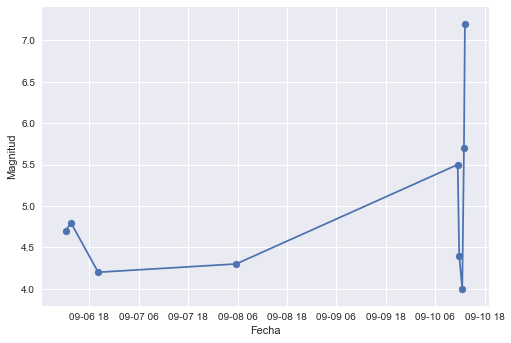

In [57]:
#Graficación
BOLANP=np.array(BOLA)
plt.plot(BOLANP[:,4],BOLANP[:,0])
plt.scatter(BOLANP[:,4].tolist(),BOLANP[:,0].tolist())
plt.xlabel("Fecha")
plt.ylabel("Magnitud")
plt.show()

Ahora copiaremos lo que hemos hecho para realizarlo con los 27. Todos los datos de los terremotos 0-n se guardaran en la BOLAm

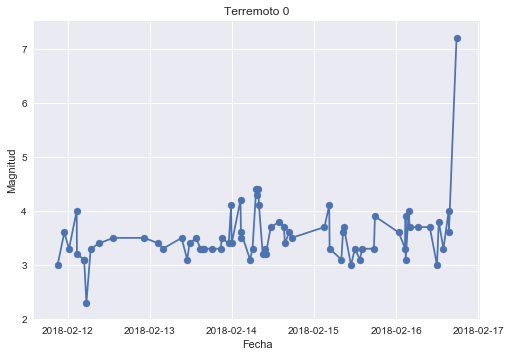

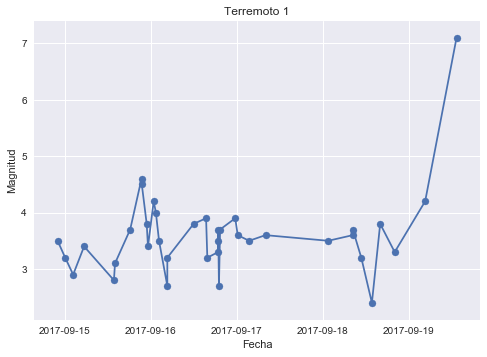

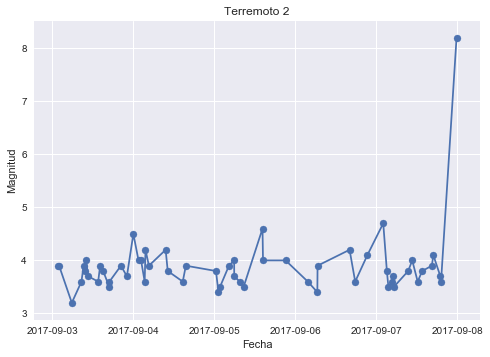

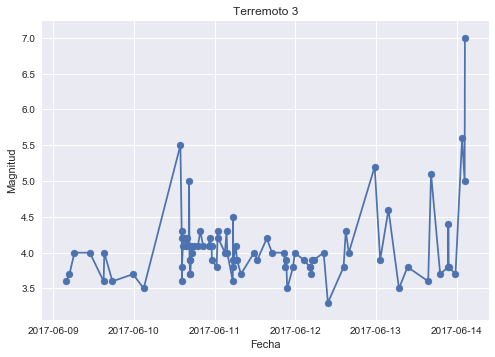

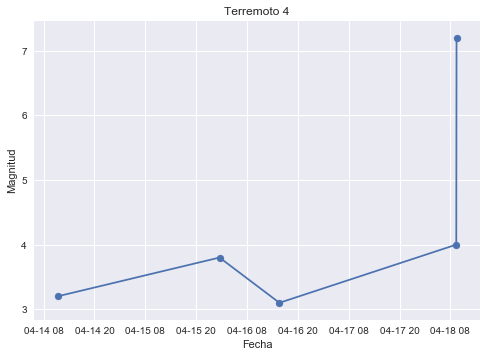

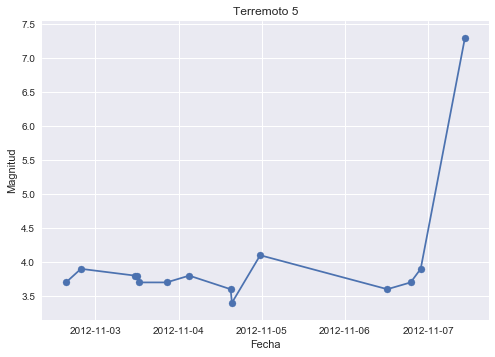

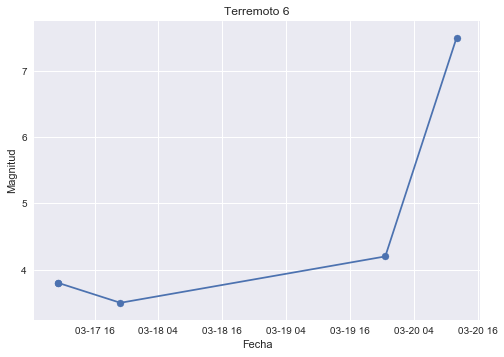

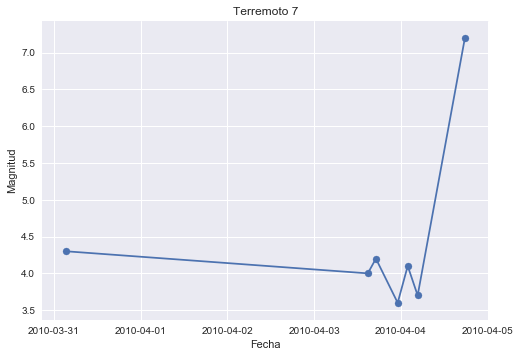

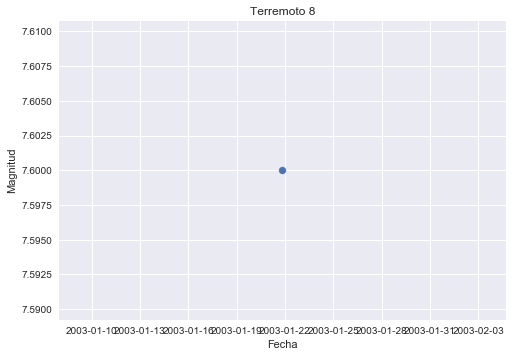

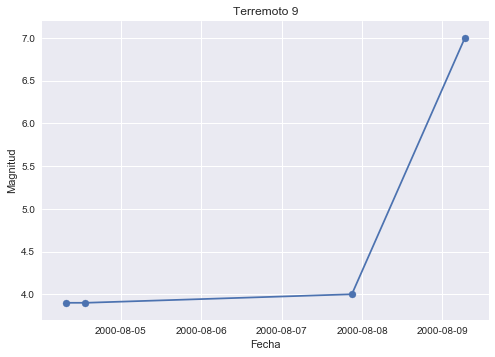

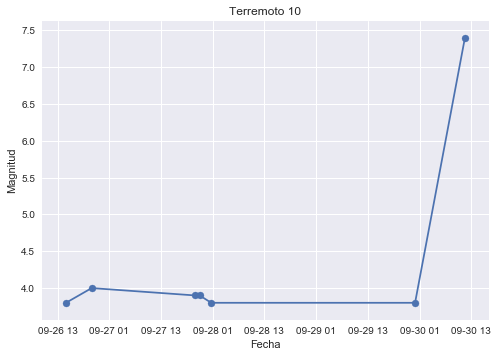

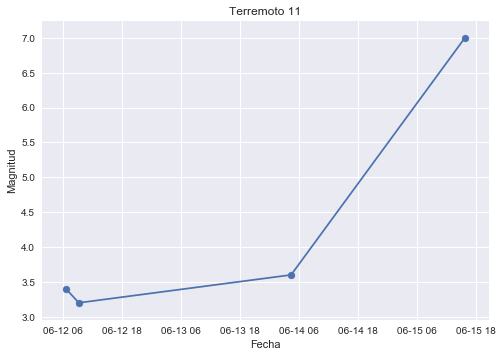

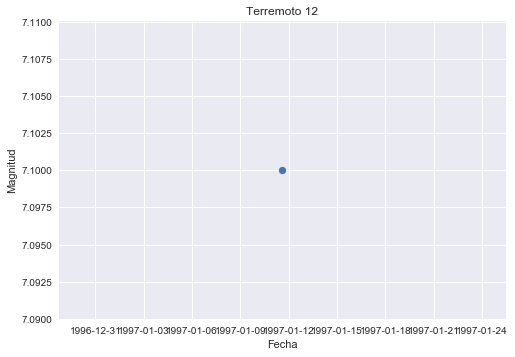

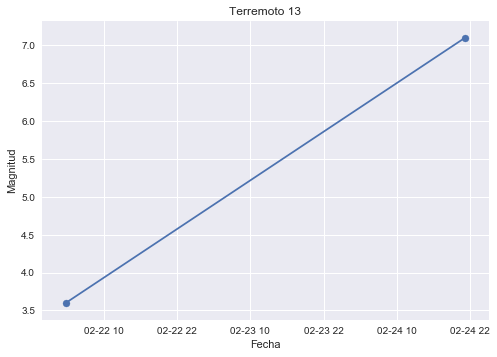

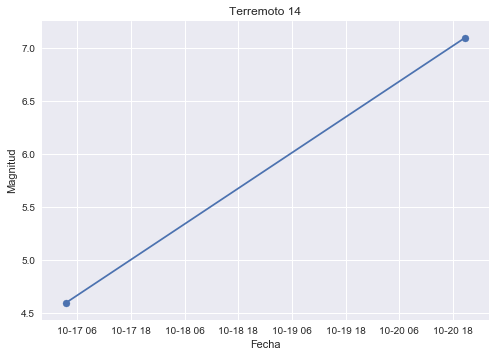

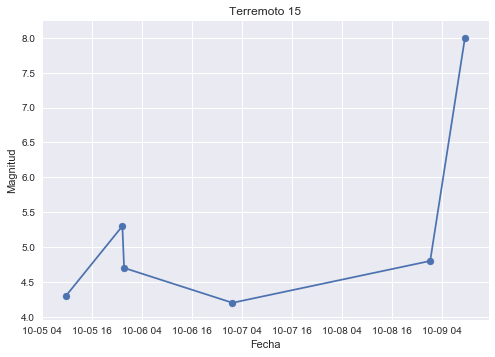

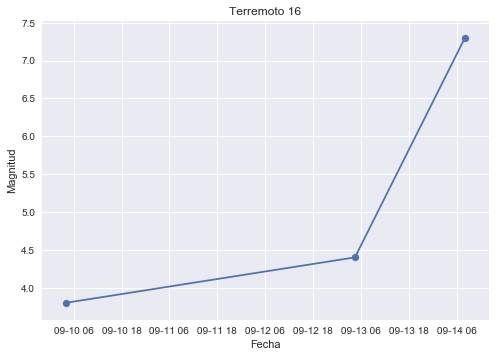

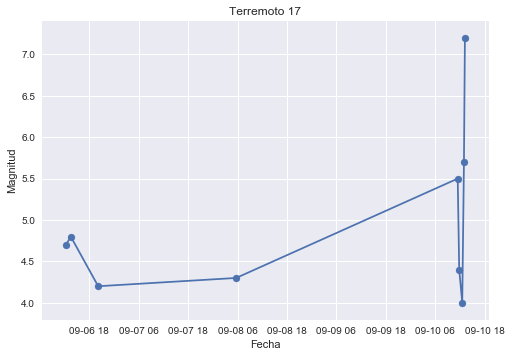

In [47]:
for i in range(len(PERROS)): 
    #COndicion 1: restricción en fechas hasta el dia del evento
    I=str(i)
    condicion1=(fecha(i)<=sismos['Fecha y Hora'])&(sismos['Fecha y Hora']<=fechasuperior(i))
#Condición 2 y 3: restricción en coordenadas
    condicion2=(longitud(i)-2<=sismos['Longitud'])&(sismos['Longitud']<=longitud(i)+2)
    condicion3=(latitud(i)-2<=sismos['Latitud'])&(sismos['Latitud']<=latitud(i)+2)
#Bola, son los datos que buscamos analizar
    globals()['BOLA{}'.format(i)]=sismos[condicion1&condicion2&condicion3]
    BOLA=sismos[condicion1&condicion2&condicion3]
    BOLANP=np.array(BOLA)
    plt.plot(BOLANP[:,4],BOLANP[:,0])
    plt.scatter(BOLANP[:,4].tolist(),BOLANP[:,0].tolist())
    plt.title("Terremoto "+I)
    plt.xlabel("Fecha")
    plt.ylabel("Magnitud")
    plt.show()

*****
```python
Integrantes:
Marco Gallegos
Fausto Morales
```
